<h1>Accident Severity</h1>

Accidents in traffic lead to associated fatalities and economic losses every year worldwide and thus is an area of primary concern to society from loss prevention point of view. Modeling accident severity prediction and improving the model are critical to the effective performance of road traffic systems for improved safety. In accident severity modeling, the input vectors are the characteristics of the accident, such as driver behavior and attributes of vehicle, highway and environment characteristics while the output vector is the corresponding class of accident severity.

There are two main engineering approaches for dealing with traffic safety problems: the reactive approach and the proactive approach. The reactive approach, or retrofit approach, consists of making the necessary improvements to variable, for instance, existing hazardous sites in order to reduce collision frequency and severity at these sites. The proactive approach, on the other hand, includes a collision prevention approach, like, preventing a potential unsafe road conditions from occurring in the first place. We focus on proactive approach which involves prediction of accident severity and working backwards, the concerned entity implements appropriate remedial measures to improve road safety. By recognizing the key factors that influence accident severity, the solution may be of great utility to various Government Departments/Authorities like Police, R&B and Transport from public policy point of view. The results of analysis and modeling can be used by these Departments to take appropriate measures to reduce accident impact and thereby improve traffic safety. It is also useful to the Insurers in terms of reduced claims and better underwriting as well as rate making.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

<b>Exploring the Data</b>

In [2]:
df_train = pd.read_csv("Accident_train.csv")
df_train.head()

,Collision_Ref_No,Policing_Area,Collision_Severity,Weekday_of_Collision,Day_of_Collision,Month_of_Collision,Hour_of_Collision,Carriageway_Type,Speed_Limit,Junction_Detail,Junction_Control,Ped_Crossing_HC,Ped_Crossing_PC,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site
0,3518,CREA,3,MON,4,8,14.0,13,60,1.0,1.0,1.0,1.0,2,9,9.0,1.0
1,10557,BELC,3,SAT,8,8,17.0,11,50,12.0,7.0,1.0,1.0,4,3,1.0,1.0
2,5002,LISB,3,WED,5,11,17.0,1,60,12.0,7.0,1.0,1.0,2,2,2.0,1.0
3,11714,BELC,3,SUN,18,10,16.0,12,70,6.0,NaN,1.0,1.0,1,3,1.0,1.0
4,12416,MIDU,3,MON,23,11,9.0,13,60,6.0,7.0,1.0,1.0,2,3,1.0,1.0


In [3]:
df_train.tail()

,Collision_Ref_No,Policing_Area,Collision_Severity,Weekday_of_Collision,Day_of_Collision,Month_of_Collision,Hour_of_Collision,Carriageway_Type,Speed_Limit,Junction_Detail,Junction_Control,Ped_Crossing_HC,Ped_Crossing_PC,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site
10038,3535,LISB,3,TUE,5,8,10.0,11,70,10.0,7.0,1.0,1.0,3,9,1.0,1.0
10039,11675,ARND,3,FRI,16,10,8.0,13,30,1.0,1.0,1.0,1.0,3,1,1.0,1.0
10040,7222,ARND,3,FRI,16,1,9.0,13,60,12.0,7.0,1.0,1.0,3,2,1.0,1.0
10041,12320,BELC,3,WED,18,11,20.0,13,30,12.0,7.0,1.0,1.0,4,9,2.0,1.0
10042,10757,NEMD,3,FRI,21,8,14.0,13,60,1.0,1.0,1.0,1.0,2,3,2.0,NaN


view the shape of data

In [4]:
df_train.shape

(10043, 17)

view the datatypes for each column

In [5]:
df_train.dtypes

Collision_Ref_No                int64
Policing_Area                  object
Collision_Severity              int64
Weekday_of_Collision           object
Day_of_Collision                int64
Month_of_Collision              int64
Hour_of_Collision             float64
Carriageway_Type                int64
Speed_Limit                     int64
Junction_Detail               float64
Junction_Control              float64
Ped_Crossing_HC               float64
Ped_Crossing_PC               float64
Light_Conditions                int64
Weather_Conditions              int64
Road_Surface_Conditions       float64
Special_Conditions_at_Site    float64
dtype: object

Type 'object' is a string for pandas, which poses problems with machine learning algorithms. If we want to use these as features, we'll need to convert these to number representations.

Get Basic Information on the DataFrame

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10043 entries, 0 to 10042
Data columns (total 17 columns):
Collision_Ref_No              10043 non-null int64
Policing_Area                 9709 non-null object
Collision_Severity            10043 non-null int64
Weekday_of_Collision          10043 non-null object
Day_of_Collision              10043 non-null int64
Month_of_Collision            10043 non-null int64
Hour_of_Collision             9759 non-null float64
Carriageway_Type              10043 non-null int64
Speed_Limit                   10043 non-null int64
Junction_Detail               9750 non-null float64
Junction_Control              9744 non-null float64
Ped_Crossing_HC               9722 non-null float64
Ped_Crossing_PC               9743 non-null float64
Light_Conditions              10043 non-null int64
Weather_Conditions            10043 non-null int64
Road_Surface_Conditions       9734 non-null float64
Special_Conditions_at_Site    9755 non-null float64
dtypes: float64(

Policing_Area, Hour_of_Collision, Junction_Detail, Junction_Detail, Junction_Control, Ped_Crossing_HC, Ped_Crossing_PC , Road_Surface_Conditions, Special_Conditions_at_Site are having missing values. 

Generate various descriptive statistics on dataframe

In [7]:
df_train.describe()

,Collision_Ref_No,Collision_Severity,Day_of_Collision,Month_of_Collision,Hour_of_Collision,Carriageway_Type,Speed_Limit,Junction_Detail,Junction_Control,Ped_Crossing_HC,Ped_Crossing_PC,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site
count,10043.000000,10043.000000,10043.000000,10043.000000,9759.000000,10043.000000,10043.000000,9750.000000,9744.000000,9722.000000,9743.000000,10043.000000,10043.000000,9734.000000,9755.000000
mean,6565.855720,2.880613,15.662153,6.655382,13.624859,12.201036,42.415613,6.400410,4.158764,1.007714,2.231243,3.237778,4.717216,1.661804,1.057099
std,3928.749772,0.359226,8.783339,3.526781,5.099759,2.744209,14.524589,5.016853,2.864940,0.114938,3.252212,2.067334,3.745739,1.470371,0.480414
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3060.500000,3.000000,8.000000,4.000000,10.000000,13.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,7009.000000,3.000000,16.000000,7.000000,14.000000,13.000000,30.000000,6.000000,4.000000,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000
75%,10078.500000,3.000000,23.000000,10.000000,17.000000,13.000000,60.000000,12.000000,7.000000,1.000000,1.000000,5.000000,9.000000,2.000000,1.000000
max,13147.000000,3.000000,31.000000,12.000000,23.000000,14.000000,70.000000,12.000000,7.000000,3.000000,12.000000,7.000000,10.000000,10.000000,6.000000


Now we have general idea of the dataset contents, we can dive deeper into each column, will be doing exploratory data analysis and cleaning data to setup 'features' we'll be using in our machine learning algorithm 

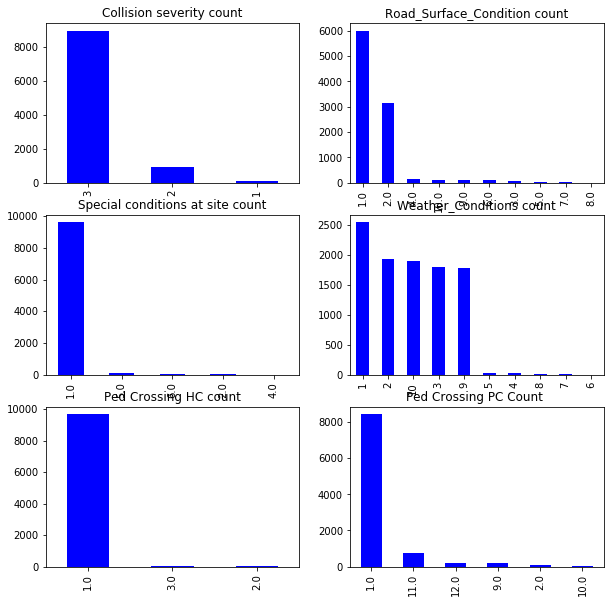

In [8]:
#setup a grid of plots
# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

fig = plt.figure(figsize=fizsize_with_subplots)
fig_dims = (3, 2)

#plot Collision_Severity count
plt.subplot2grid(fig_dims, (0, 0))
df_train['Collision_Severity'].value_counts().plot(kind='bar', \
                                                title='Collision severity count', \
                                                   color='blue')

#Road Surface conditions
plt.subplot2grid(fig_dims, (0, 1))
df_train['Road_Surface_Conditions'].value_counts().plot(kind='bar', \
                                                title='Road_Surface_Condition count', \
                                                       color='blue')

#Special_Conditions_at_Site
plt.subplot2grid(fig_dims, (1, 0))
df_train['Special_Conditions_at_Site'].value_counts().plot(kind='bar', \
                                                title='Special conditions at site count', \
                                                       color='blue')


#Special_Conditions_at_Site
plt.subplot2grid(fig_dims, (1, 1))
df_train['Weather_Conditions'].value_counts().plot(kind='bar', \
                                                title='Weather_Conditions count', \
                                                       color='blue')




#Ped_Crossing HC
plt.subplot2grid(fig_dims, (2, 0))
df_train['Ped_Crossing_HC'].value_counts().plot(kind='bar', \
                                                title='Ped Crossing HC count', \
                                                       color='blue')

#Ped_Crossing_PC
plt.subplot2grid(fig_dims, (2, 1))
df_train['Ped_Crossing_PC'].value_counts().plot(kind='bar', \
                                                title='Ped Crossing PC Count ', \
                                                       color='blue')

plt.show()

Next we'll explore the features to view their impact on survival rates

<h2>Feature:  Weather Condition</h2>

In the previous exploratory analysis we see collision severity is high for fatal injury collision, compared to serious and slight injury.

The weather condition has high variation with number of casualities, so let us check the proportion of collision severity on the weather condition

In [9]:
wcondi_xt = pd.crosstab(df_train['Weather_Conditions'], \
                       df_train['Collision_Severity'])
wcondi_xt

Collision_Severity,1,2,3
Weather_Conditions,,,
1,81,652,1810
2,20,122,1789
3,0,5,1793
4,5,15,0
5,4,29,0
6,1,2,0
7,2,6,0
8,0,13,0
9,1,36,1750


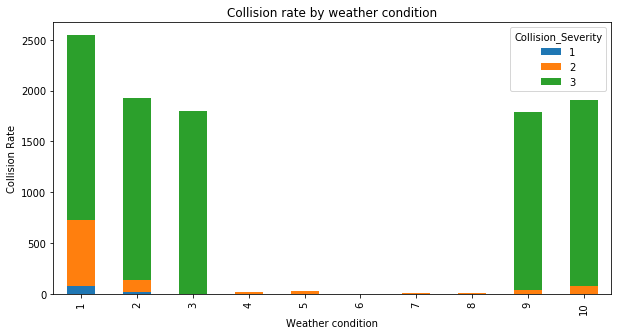

In [10]:
# Normalize the cross tab to sum to 1:
#wcondi_xt = wcondi_xt.div(wcondi_xt.sum(1).astype(float), axis=0)

wcondi_xt.plot(kind='bar', 
                   stacked=True, \
                   title='Collision rate by weather condition')
plt.xlabel('Weather condition')
plt.ylabel('Collision Rate')
plt.show()

High wind and Hazard fog are the major reason for the Fatal and Serious Injury collision

1 :  Fatal injury collision<br>
2 :  Serious injury collision
    #weather Condition
    4 :  Fine with high winds
    5 :  Raining with high winds
    6 :  Snowing with high winds
    7 :  Fog or mist - if hazard
    8 :  Strong sun (glaring)


<h2>Feature:  Light Conditions</h2>

In [11]:
Lcondi_xt = pd.crosstab(df_train['Light_Conditions'], \
                       df_train['Collision_Severity'])
Lcondi_xt

Collision_Severity,1,2,3
Light_Conditions,,,
1,28,237,2309
2,39,231,2039
3,11,113,1281
4,5,116,695
5,10,75,980
6,15,84,498
7,12,103,1162


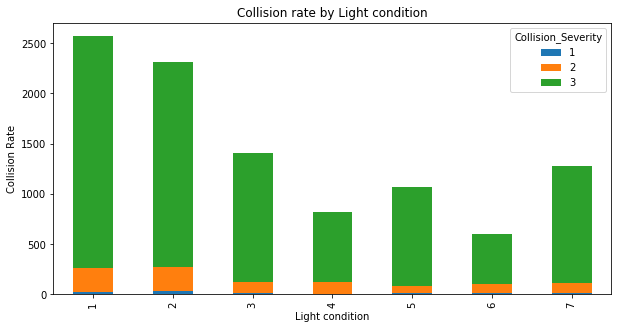

In [12]:
# Normalize the cross tab to sum to 1:
#Lcondi_xt = Lcondi_xt.div(Lcondi_xt.sum(1).astype(float), axis=0)

Lcondi_xt.plot(kind='bar', 
                   stacked=True, \
                   title='Collision rate by Light condition')
plt.xlabel('Light condition')
plt.ylabel('Collision Rate')
plt.show()

-Interms of Darkness the more from "street lights present but unlit" than the "street lights present and lit"<br>
-But "Fatal Injury Collisions" are from street lights present but unlit<br>
-"Fatal Injury Collisions" are high with "No Light Conditions" than "Light Conditions"

<h2>Feature: Road_Surface_Conditions</h2>

In [13]:
Rcondi_xt = pd.crosstab(df_train['Road_Surface_Conditions'], \
                       df_train['Collision_Severity'])
Rcondi_xt

Collision_Severity,1,2,3
Road_Surface_Conditions,,,
1.0,69,559,5370
2.0,43,302,2791
3.0,0,5,55
4.0,3,19,135
5.0,1,3,26
6.0,0,10,87
7.0,0,5,21
8.0,0,3,6
9.0,0,11,87


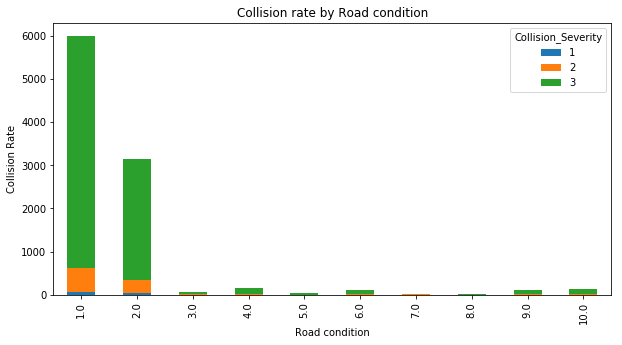

In [14]:
# Normalize the cross tab to sum to 1:
#Rcondi_xt = Rcondi_xt.div(Rcondi_xt.sum(1).astype(float), axis=0)

Rcondi_xt.plot(kind='bar', 
                   stacked=True, \
                   title='Collision rate by Road condition')
plt.xlabel('Road condition')
plt.ylabel('Collision Rate')
plt.show()

<h2>Feature: Pedestrian Crossing – Human Control/Physical Control</h2>

During Univariate Analysis, I found that the more number of collisions are happening in the place of No Control(Human or Physical). Its clear that more number of Collisions are Slight Injury collisions.

But I want to check the collision distribuition for Fatal and Serious Injuries. for both Human and Physical Controlled Pedestrian crossing

In [15]:
col_severity_1 = df_train[df_train["Collision_Severity"] == 1]
print(len(col_severity_1))

col_severity_2 = df_train[df_train["Collision_Severity"] == 2]
print(len(col_severity_2))

120
959


There are total of 120 Fatal injury collisions and 959 serious injury collision

<b>Pedistrian Crossing HC Zone</b>

In [16]:
pcrossHC_sev1_xt = pd.crosstab(col_severity_1['Ped_Crossing_HC'], \
                       col_severity_1['Collision_Severity'])
print(pcrossHC_sev1_xt)

print(' ')
pcrossHC_sev2_xt = pd.crosstab(col_severity_2['Ped_Crossing_HC'], \
                       col_severity_2['Collision_Severity'])
print(pcrossHC_sev2_xt)


Collision_Severity    1
Ped_Crossing_HC        
1.0                 117
 
Collision_Severity    2
Ped_Crossing_HC        
1.0                 923
2.0                   2
3.0                   3


Pedistrian crossing zone with No Human Control is major cause for High Number of collision

<b>Pedistrian Crossing PC Zone</b>

In [17]:
pcrossPC_sev1_xt = pd.crosstab(col_severity_1['Ped_Crossing_PC'], \
                       col_severity_1['Collision_Severity'])
print(pcrossPC_sev1_xt)

print(' ')
pcrossPC_sev2_xt = pd.crosstab(col_severity_2['Ped_Crossing_PC'], \
                       col_severity_2['Collision_Severity'])
print(pcrossPC_sev2_xt)

Collision_Severity    1
Ped_Crossing_PC        
1.0                 111
2.0                   1
9.0                   2
11.0                  1
12.0                  3
 
Collision_Severity    2
Ped_Crossing_PC        
1.0                 811
2.0                  11
9.0                  14
10.0                  6
11.0                 66
12.0                 24


Pedistrian crossing in the no physical control place is another major reason for higher collisions.

Other Causes</br>
Pedestrian phase at traffic signal junction<br>
Non junction pedestrian light crossing

Collision Severity is potentially high from the place with No Human control while pedistrecian crossing Road

<h2>Feature: Weekday of Collision</h2>

In [18]:
week_day_collision = pd.crosstab(df_train['Weekday_of_Collision'], \
                       df_train['Collision_Severity'])
print(week_day_collision)

Collision_Severity     1    2     3
Weekday_of_Collision               
FRI                   20  158  1515
MON                   14  122  1289
SAT                   14  151  1138
SUN                   19  147   897
THU                   14  127  1422
TUE                   20  122  1321
WED                   19  132  1382


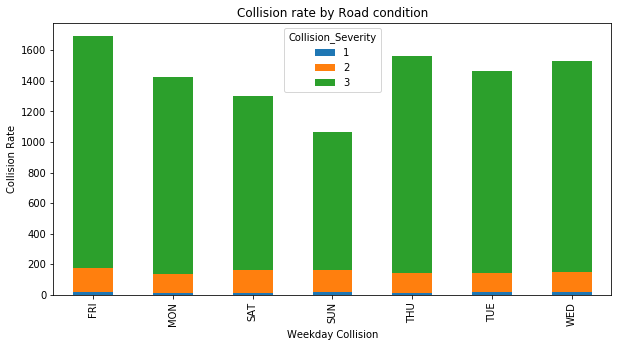

In [19]:
week_day_collision.plot(kind='bar', 
                   stacked=True, \
                   title='Collision rate by Road condition')
plt.xlabel('Weekday Collision')
plt.ylabel('Collision Rate')
plt.show()

More accidents are happening in the Weekdays compared to Weekends

High Casualities are on Friday<br>
Less Casualities are on Sunday

<h2>Features WeekDay and Hour of the Day</h2>

In [20]:
week_day_vs_hour_collision = pd.crosstab(df_train['Hour_of_Collision'], \
                       df_train['Weekday_of_Collision'])
print(week_day_vs_hour_collision)

Weekday_of_Collision  FRI  MON  SAT  SUN  THU  TUE  WED
Hour_of_Collision                                      
0.0                    22   14   26   40    8   15   18
1.0                    14   16   27   45   15   10    9
2.0                     9   16   21   52   10   10    7
3.0                     5    5   16   41    7    4    7
4.0                     2    6    9   11    6    3    5
5.0                     9    7   10    9    6    4    7
6.0                    28   17   11   14   17    9   16
7.0                    61   56   17    7   55   51   69
8.0                   100  128   34   19  144  127  104
9.0                    88   88   44   27  103   96   89
10.0                   73   54   61   37   70   72   67
11.0                   87   61   82   54   63   60   66
12.0                  106   73   88   63   86   74   95
13.0                   87   92  134   83  104   83   77
14.0                  115   91   99   76  102   99  118
15.0                  136  102   90   68  123  1

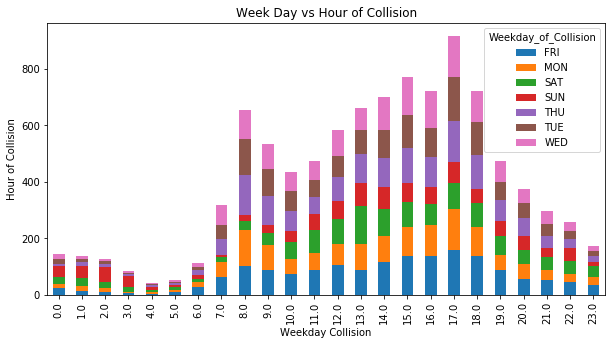

In [21]:
week_day_vs_hour_collision.plot(kind='bar', 
                   stacked=True, \
                   title='Week Day vs Hour of Collision')
plt.xlabel('Weekday Collision')
plt.ylabel('Hour of Collision')
plt.show()

The more number of Accidents are happening between 7AM to 19PM

<h3>Handling Missing Values</h3>

In [22]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Policing_Area,334,0.033257
Ped_Crossing_HC,321,0.031963
Road_Surface_Conditions,309,0.030768
Ped_Crossing_PC,300,0.029872
Junction_Control,299,0.029772
Junction_Detail,293,0.029175
Special_Conditions_at_Site,288,0.028677
Hour_of_Collision,284,0.028278
Day_of_Collision,0,0.000000
Collision_Severity,0,0.000000


<b>Missing Value Imputation</b>

The Missing value percentage in all the variable is between 2 - 4%. So though to impute the every variables seperately

<b>Policing_Area</b>

In [24]:
missing_policing = df_train.groupby(['Policing_Area'])['Policing_Area'].count().sort_values(ascending=False)
missing_policing[:5]

Policing_Area
BELC    1256
ARBC     469
LISC     438
NEMD     438
LISB     381
Name: Policing_Area, dtype: int64

The more number of collisions are from BELC. So I thought to impute the missing values with mode for the policing variable

In [25]:
df_train['Policing_Area'].mode()

0    BELC
dtype: object

In [26]:
df_train['Policing_Area'] = df_train['Policing_Area'].fillna(df_train['Policing_Area'].mode()[0])

Looking at the Daya, most of the variables are biased. So thought to impute the missing values with mode

In [27]:
df_train['Ped_Crossing_HC'] = df_train['Ped_Crossing_HC'].fillna(df_train['Ped_Crossing_HC'].mode()[0])
df_train['Road_Surface_Conditions'] = df_train['Road_Surface_Conditions'].fillna(df_train['Road_Surface_Conditions'].mode()[0])
df_train['Ped_Crossing_PC'] = df_train['Ped_Crossing_PC'].fillna(df_train['Ped_Crossing_PC'].mode()[0])
df_train['Junction_Control'] = df_train['Junction_Control'].fillna(df_train['Junction_Control'].mode()[0])
df_train['Junction_Detail'] = df_train['Junction_Detail'].fillna(df_train['Junction_Detail'].mode()[0])
df_train['Special_Conditions_at_Site'] = df_train['Special_Conditions_at_Site'].fillna(df_train['Special_Conditions_at_Site'].mode()[0])
df_train['Hour_of_Collision'] = df_train['Hour_of_Collision'].fillna(df_train['Hour_of_Collision'].mode()[0])

In [28]:
df_train.isnull().sum().sort_values(ascending=False)

Special_Conditions_at_Site    0
Carriageway_Type              0
Policing_Area                 0
Collision_Severity            0
Weekday_of_Collision          0
Day_of_Collision              0
Month_of_Collision            0
Hour_of_Collision             0
Speed_Limit                   0
Road_Surface_Conditions       0
Junction_Detail               0
Junction_Control              0
Ped_Crossing_HC               0
Ped_Crossing_PC               0
Light_Conditions              0
Weather_Conditions            0
Collision_Ref_No              0
dtype: int64

<h3>Checking for the Duplicates</h3>

In [29]:
df_train.duplicated().sum()

0

No Duplicates

<h3>Checking Pearson Correlation</h3>

In [162]:
corr_1 = df_train[df_train['Ped_Crossing_HC'] == 1]
correlation = corr_1[['Ped_Crossing_HC', 'Collision_Severity']].corr(method='pearson')
print(correlation)

                    Ped_Crossing_HC  Collision_Severity
Ped_Crossing_HC                 NaN                 NaN
Collision_Severity              NaN                 1.0


<b>Correlation Analysis</b>

In [31]:
import seaborn as sns
#Corelation Matrix
corrmat = df_train.corr()
corrmat

,Collision_Ref_No,Collision_Severity,Day_of_Collision,Month_of_Collision,Hour_of_Collision,Carriageway_Type,Speed_Limit,Junction_Detail,Junction_Control,Ped_Crossing_HC,Ped_Crossing_PC,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site
Collision_Ref_No,1.000000,0.005700,0.047276,0.448113,0.015147,0.009736,0.017225,-0.007012,-0.014048,-0.006046,0.012721,0.008649,-0.001407,-0.003563,0.012874
Collision_Severity,0.005700,1.000000,-0.019886,0.005644,0.010722,-0.030402,-0.114203,0.021521,0.019150,0.002338,0.018235,0.001890,0.204848,-0.012583,-0.021367
Day_of_Collision,0.047276,-0.019886,1.000000,-0.019781,0.018447,0.018485,0.030740,-0.018484,-0.016792,0.003543,-0.008809,0.005488,0.002490,-0.003760,-0.000211
Month_of_Collision,0.448113,0.005644,-0.019781,1.000000,0.006587,0.001284,-0.002769,0.001688,-0.002868,-0.001786,0.009605,0.021880,-0.002908,0.001090,-0.005369
Hour_of_Collision,0.015147,0.010722,0.018447,0.006587,1.000000,-0.011947,-0.063001,0.029630,0.021912,0.002607,0.004117,0.178147,-0.006015,0.010112,0.013253
Carriageway_Type,0.009736,-0.030402,0.018485,0.001284,-0.011947,1.000000,0.096832,0.004720,-0.013921,0.013451,-0.017257,0.015270,0.000116,0.004846,0.002684
Speed_Limit,0.017225,-0.114203,0.030740,-0.002769,-0.063001,0.096832,1.000000,-0.083841,-0.046000,-0.035232,-0.157273,0.088901,-0.030649,0.054693,-0.029179
Junction_Detail,-0.007012,0.021521,-0.018484,0.001688,0.029630,0.004720,-0.083841,1.000000,0.815877,0.039031,0.113510,-0.009708,0.002368,-0.075462,-0.010429
Junction_Control,-0.014048,0.019150,-0.016792,-0.002868,0.021912,-0.013921,-0.046000,0.815877,1.000000,-0.022529,-0.052857,-0.001281,-0.005153,-0.091495,-0.021781
Ped_Crossing_HC,-0.006046,0.002338,0.003543,-0.001786,0.002607,0.013451,-0.035232,0.039031,-0.022529,1.000000,0.142748,-0.016966,-0.005828,-0.002491,0.114981


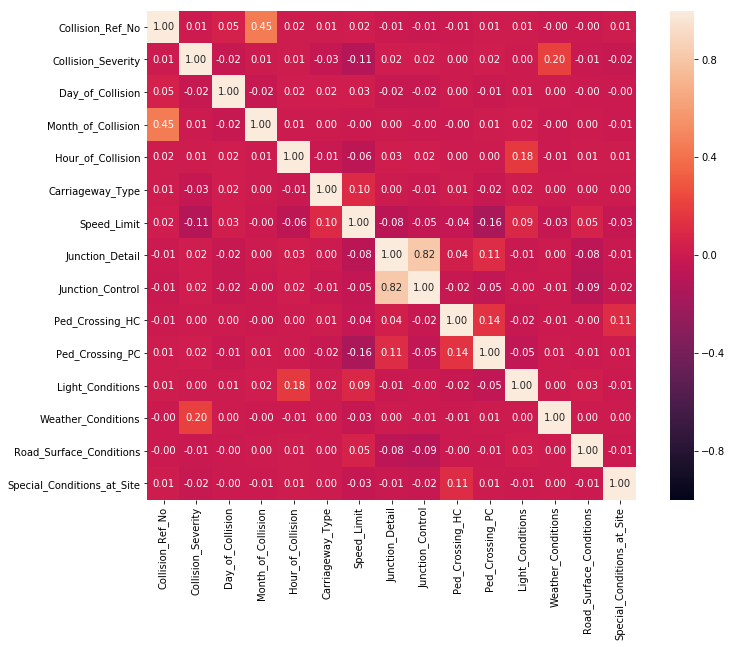

In [33]:
f, ax = plt.subplots(figsize=(12, 9))
#control the positive and negative correlation with vmin, vmax
sns.heatmap(corrmat, vmin=-1, vmax =1, square=True, annot=True, fmt='.2f', annot_kws={'size': 10})
plt.show()

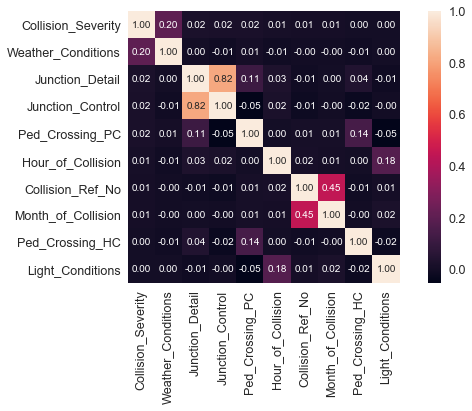

In [34]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Collision_Severity')['Collision_Severity'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Very few of the Variables are moderately correlated. Junction control and Junction Detail are positively corelated

Collision Ref No correlated with Month_of Collision. But No sense of Keeping Reference numbers while modeling

In [84]:
df_train.shape

(10043, 17)

<h2>Data Preparation for Machine Learning</h2>

Many machine learning algorithms do not work on strings and they usually require the data to be in an array, not a DataFrame.

Show only the columns of type 'object' (strings):

In [35]:
df_train.dtypes[df_train.dtypes.map(lambda x: x == 'object')]

Policing_Area           object
Weekday_of_Collision    object
dtype: object

<b>Label Encoding</b>

In [36]:
df_clean = df_train
df_clean.head()

,Collision_Ref_No,Policing_Area,Collision_Severity,Weekday_of_Collision,Day_of_Collision,Month_of_Collision,Hour_of_Collision,Carriageway_Type,Speed_Limit,Junction_Detail,Junction_Control,Ped_Crossing_HC,Ped_Crossing_PC,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site
0,3518,CREA,3,MON,4,8,14.0,13,60,1.0,1.0,1.0,1.0,2,9,9.0,1.0
1,10557,BELC,3,SAT,8,8,17.0,11,50,12.0,7.0,1.0,1.0,4,3,1.0,1.0
2,5002,LISB,3,WED,5,11,17.0,1,60,12.0,7.0,1.0,1.0,2,2,2.0,1.0
3,11714,BELC,3,SUN,18,10,16.0,12,70,6.0,7.0,1.0,1.0,1,3,1.0,1.0
4,12416,MIDU,3,MON,23,11,9.0,13,60,6.0,7.0,1.0,1.0,2,3,1.0,1.0


In [37]:
from sklearn.preprocessing import LabelEncoder

lb_encode = LabelEncoder()
df_clean['Policing_Area'] = lb_encode.fit_transform(df_clean['Policing_Area'])
df_clean['Weekday_of_Collision'] = lb_encode.fit_transform(df_clean['Weekday_of_Collision'])

In [38]:
df_clean.head()

,Collision_Ref_No,Policing_Area,Collision_Severity,Weekday_of_Collision,Day_of_Collision,Month_of_Collision,Hour_of_Collision,Carriageway_Type,Speed_Limit,Junction_Detail,Junction_Control,Ped_Crossing_HC,Ped_Crossing_PC,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site
0,3518,19,3,1,4,8,14.0,13,60,1.0,1.0,1.0,1.0,2,9,9.0,1.0
1,10557,7,3,2,8,8,17.0,11,50,12.0,7.0,1.0,1.0,4,3,1.0,1.0
2,5002,28,3,6,5,11,17.0,1,60,12.0,7.0,1.0,1.0,2,2,2.0,1.0
3,11714,7,3,3,18,10,16.0,12,70,6.0,7.0,1.0,1.0,1,3,1.0,1.0
4,12416,32,3,1,23,11,9.0,13,60,6.0,7.0,1.0,1.0,2,3,1.0,1.0


In [39]:
df_clean.shape

(10043, 17)

<h3>Creating a New Variables</h3>

We noticed that the more accidents are happening in the pedistrian zone with no Human or Physical control. So we created a new variables by combining the Ped_Crossing_HC and Ped_Crossing_PC with the severity of collisions

1. ped_nocntr_Sev_1: Ped Crossing with no Human or Physical control and severity - 1
2. ped_nocntr_Sev_2: Ped Crossing with no Human or Physical control and severity - 2
3. ped_nocntr_Sev_3: Ped Crossing with no Human or Physical control and severity - 3

In [66]:
df_train['Collision_Severity'].value_counts()

3    8964
2     959
1     120
Name: Collision_Severity, dtype: int64

The Target Class is Unbiased with 8964, 959, 120 collision severity

In [96]:
#Collision severity 1 in the no control zone while Pedistrian crossing
df_clean["ped_nocntr_Sev_1"] = df_clean['Ped_Crossing_HC'][(df_clean['Ped_Crossing_HC']==1) &
                                                   (df_clean['Ped_Crossing_PC']==1) &
                                                   
                                (df_clean['Collision_Severity'] == 1) ]
df_clean["ped_nocntr_Sev_1"] = df_clean.pc_NC_SV.fillna(0)



#Collision severity 2 in the no control zone while Pedistrian crossing
df_clean["ped_nocntr_Sev_2"] = df_clean['Ped_Crossing_HC'][(df_clean['Ped_Crossing_HC']==1) &
                                                   (df_clean['Ped_Crossing_PC']==1) &
                                                   
                                (df_clean['Collision_Severity'] == 2) ]
df_clean["ped_nocntr_Sev_2"] = df_clean.pc_NC_SV.fillna(0)


#Collision severity 3 in the no control zone while Pedistrian crossing  
df_clean["ped_nocntr_Sev_3"] = df_clean['Ped_Crossing_HC'][(df_clean['Ped_Crossing_HC']==1) &
                                                   (df_clean['Ped_Crossing_PC']==1) &
                                                   
                                (df_clean['Collision_Severity'] == 3) ]
df_clean["ped_nocntr_Sev_3"] = df_clean.pc_NC_SV.fillna(0)

<b>Pedistrian Crossing zone with Control</b>

In [97]:
#Pedestrian crossing zone with Human Control
df_clean["pedHC_Control"] = df_clean['Ped_Crossing_HC'][(df_clean['Ped_Crossing_HC']!=1)]
df_clean["pedHC_Control"] = df_clean.pedHC_Control.fillna(0)

#Pedestrian crossing zone with Physical Control
df_clean["pedPC_Control"] = df_clean['Ped_Crossing_PC'][(df_clean['Ped_Crossing_PC']!=1)]
df_clean["pedPC_Control"] = df_clean.pedPC_Control.fillna(0)

Drop the columns we won't use and create the features and labels array

In [98]:
X = df_clean.drop(['Collision_Ref_No', 'Collision_Severity', 'Ped_Crossing_HC', \
                  'Ped_Crossing_PC'], 1)
X = np.array(X)
print(X)

[[ 19.   1.   4. ...,   0.   0.   0.]
 [  7.   2.   8. ...,   0.   0.   0.]
 [ 28.   6.   5. ...,   0.   0.   0.]
 ..., 
 [  5.   0.  16. ...,   0.   0.   0.]
 [  7.   6.  18. ...,   0.   0.   0.]
 [ 36.   0.  21. ...,   0.   0.   0.]]


In [99]:
y = df_train['Collision_Severity']
y = np.array(y)
print(y)

[3 3 3 ..., 3 3 3]


<h3>PCA</h3>

In [104]:
from sklearn.decomposition import PCA

pca_fit = PCA(n_components=10)
pca_fit.fit(X)
pca_samples = pca_fit.transform(X)

In [198]:
print('Original number of features:', X.shape[1])
print('Reduced number of features:', pca_samples.shape[1])

Original number of features: 19
Reduced number of features: 10


In [105]:
pca_variance = pca_fit.explained_variance_ratio_

pca_variance[0:10].sum()

0.98440319172350788

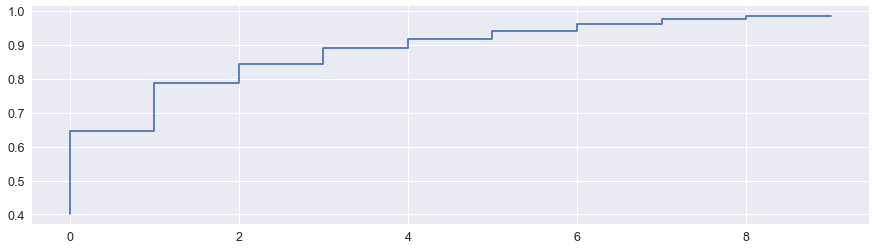

In [199]:
fig, ax = plt.subplots(figsize=(15, 4))
#sns.set(font_scale=1)
plt.step(range(pca_samples.shape[1]), pca_fit.explained_variance_ratio_.cumsum(), \
        label='cumulative explained variance')
plt.show()

98% of variance captured with 10 components

<h3>Decission Tree: Training</h3>

Importing the module to split the data for training and testing purpose

In [100]:
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split

Seperating the Training and Testing data

In [173]:
x_train, x_test, y_train, y_test = train_test_split(pca_samples, y, test_size=0.2, \
                                                    random_state=42)

print("Training Features shape", x_train.shape)
print("Testing Features shape", x_test.shape)
print("Training Labels shape", y_train.shape)
print("Testing Labels shape", y_test.shape)

Training Features shape (8034, 10)
Testing Features shape (2009, 10)
Training Labels shape (8034,)
Testing Labels shape (2009,)


Creating Decission Tree Object

In [174]:

from sklearn.tree import DecisionTreeClassifier


clf = DecisionTreeClassifier(criterion='gini', max_depth=10,\
                                            min_samples_split=30)

Fit the Training Data and Create the Decission Trees

In [179]:
clf_train = clf.fit(x_train, y_train)

clf_score = clf_train.score(x_test, y_test)
print("Mean Accuracy of Decission_tree {}".format(clf_score))

Mean Accuracy of Decission_tree 0.8770532603285216


<h3>Evaluate Model Accuracy</h3>

In [180]:
clf_predict = clf_train.predict(x_test)
print(clf_predict[:100])

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [181]:
clf_prob = clf_train.predict_proba(x_test)[:,1]
print("Predicting the probability of Model Classifier", clf_prob)

Predicting the probability of Model Classifier [ 0.0256144   0.45454545  0.0256144  ...,  0.          0.          0.        ]


Get the Model Score by Confusion Matrix

In [182]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, clf_predict, labels=[1, 2, 3])

array([[   0,    2,   18],
       [   3,   25,  165],
       [   5,   54, 1737]])

<h3>Precison and Recall</h3>

The classification report provides a comprehensive view on how the classifier performs on each class. 

<img src="clf_report.png" /img width=400>

In [197]:
from sklearn.metrics import classification_report

report = classification_report(y_test, clf_predict)
print(report)

             precision    recall  f1-score   support

          1       0.00      0.00      0.00         9
          2       0.63      0.26      0.36       105
          3       0.91      0.98      0.95       890

avg / total       0.87      0.90      0.88      1004



/Users/afnity_computer/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


With the 87% of Decission tree accuracy, the model is failed to classify the Fatal and Serious collisions. Tuning the parameters, eliminating the zero variance variables or working optimal depth for decission tree might help us increase the model accuracy

<b>Random Forest</b>

In [183]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100,
                                       criterion='gini', 
                                n_jobs=-1)
clf_train =  random_forest.fit(x_train, y_train)
clf_score = clf_train.score(x_test, y_test)
print(clf_score)



0.894972623196


In [184]:
clf_predict = clf_train.predict(x_test)
print(clf_predict[:100])

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [185]:
clf_prob = clf_train.predict_proba(x_test)[:,1]
print("Predicting the probability of Model Classifier", clf_prob)

Predicting the probability of Model Classifier [ 0.29  0.25  0.03 ...,  0.04  0.04  0.16]


In [186]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, clf_predict, labels=[1, 2, 3])

array([[   0,    3,   17],
       [   0,   16,  177],
       [   1,   13, 1782]])

<h3>Hyper Parameter Tuning</h3>

In [187]:
from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold(n_splits=10)
for train_indices, test_indices in k_fold.split(pca_samples, y):
    x_train, x_test = pca_samples[train_indices], pca_samples[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

In [188]:
#shape of training and testing
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

9039
1004
9039
1004


<h3>Random Forest After with KFold Split</h3>

In [189]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100,
                                       criterion='gini', 
                                n_jobs=-1)
clf_train =  random_forest.fit(x_train, y_train)
clf_score = clf_train.score(x_test, y_test)
print(clf_score)

0.888446215139


<h3>Decision Tree with KFold Split</h3>

In [190]:
from sklearn.tree import DecisionTreeClassifier


clf = DecisionTreeClassifier(criterion='gini', max_depth=10,\
                                            min_samples_split=30)

clf_train = clf.fit(x_train, y_train)

clf_score = clf_train.score(x_test, y_test)
print("Mean Accuracy of Decission_tree {}".format(clf_score))


Mean Accuracy of Decission_tree 0.8814741035856574


<h3>Support Vector Machine with KFold Split</h3>

In [191]:
from sklearn import svm

svm_clf = svm.SVC(C=1.0, kernel='rbf')

clf_train =  svm_clf.fit(x_train, y_train)
clf_score = clf_train.score(x_test, y_test)
print(clf_score)

0.884462151394


<h3>AdaBoost with KFold Grid Search</h3>

In [203]:
parameters = {'max_depth': [3, 10, None]}

decision_tree = DecisionTreeClassifier(criterion='gini', min_samples_split=30)


from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(decision_tree, parameters, n_jobs=-1, cv=3)
grid_search = grid_search.fit(x_train, y_train)

print(grid_search.best_params_)


{'max_depth': 3}


In [207]:
from  sklearn.ensemble import AdaBoostClassifier
clf_adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3, min_samples_split=30), 
                                 n_estimators=600,
                                 learning_rate=0.5,
                                 algorithm='SAMME')

clf_train =  clf_adaboost.fit(x_train, y_train)
clf_score = clf_train.score(x_test, y_test)
print(clf_score)

0.885458167331


In [208]:
clf_predict = clf_train.predict(x_test)
print(clf_predict[:100])

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 2 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [209]:
clf_prob = clf_train.predict_proba(x_test)[:,1]
print("Predicting the probability of Model Classifier", clf_prob)

Predicting the probability of Model Classifier [ 0.33497097  0.3419943   0.33588716 ...,  0.33964397  0.33911732
  0.32986998]


In [210]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, clf_predict, labels=[1, 2, 3])

array([[  0,   2,   7],
       [  0,  15,  90],
       [  0,  16, 874]])